In [1]:
from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()

In [12]:
import pandas as pd

data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
target = pd.Series(house_dataset.target, name = 'MedPrice')

In [14]:
from os import X_OK
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.2,
                                                    random_state=42)

# **EDA**

In [48]:
# 1. 결측값 확인
train_data = X_train.copy() #원본 데이터 보존

train_data['MedPrice'] = y_train #feature, target 합치기
print(f"-- check for missing values in training data --\n{train_data.isnull().sum()}")
print(f"-- check for missing values in training data --\n{X_test.isnull().sum()}")

-- check for missing values in training data --
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedPrice      0
dtype: int64
-- check for missing values in training data --
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


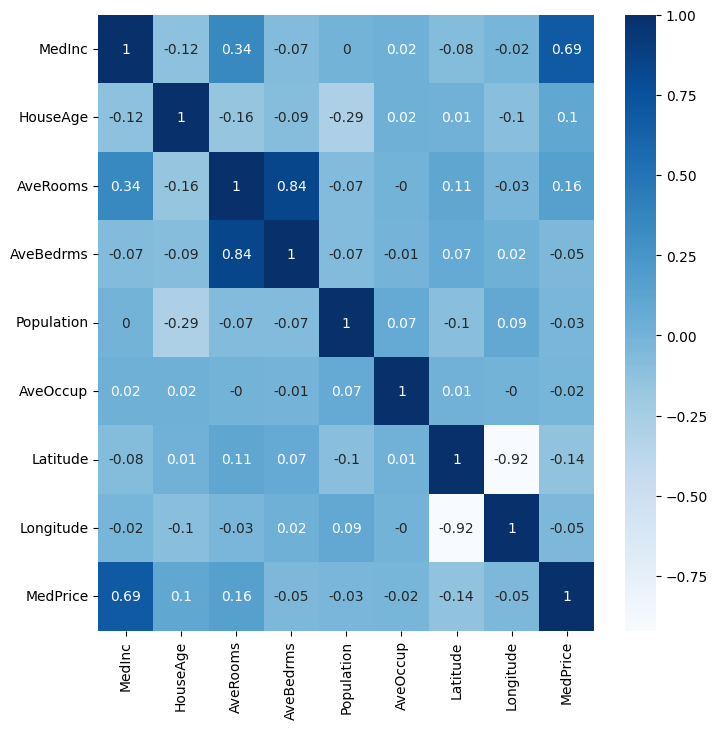

In [57]:
# 2. 피어슨 상관 계수 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(train_data.corr().round(2), annot=True,cmap = 'Blues')
plt.show()
#MedInc, AveRooms가 0.69, 0.16의 상관관계를 보임.

In [58]:
#3. 피처 선별
selected_feature_set = ['MedInc', 'AveRooms']
sub_train_data = train_data[selected_feature_set + ['MedPrice']] #새로운 데이터셋

X_train = sub_train_data.drop('MedPrice', axis=1)
X_test = X_test[selected_feature_set]

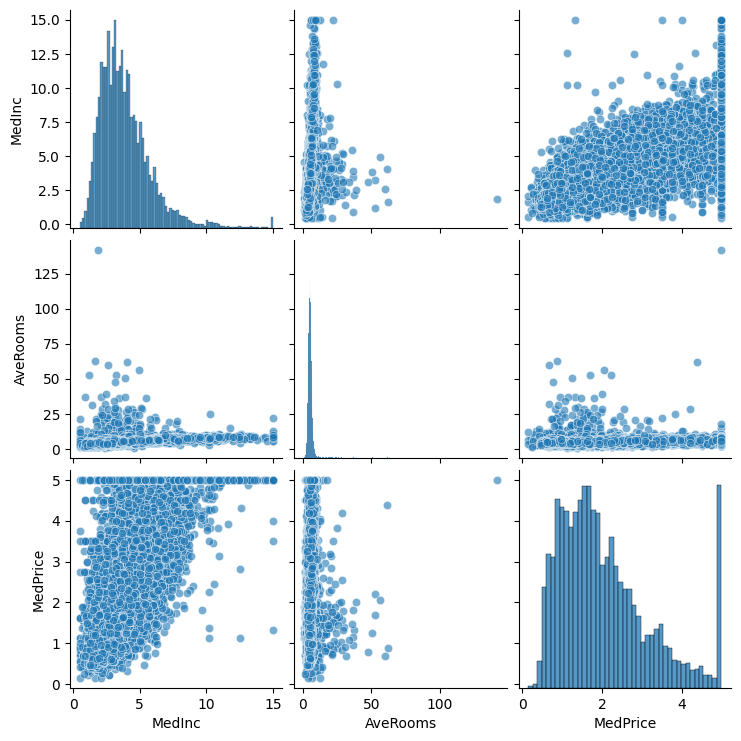

In [63]:
# 산점도와 함께 히스토그램으로 표현된 분포도
sns.pairplot(sub_train_data, plot_kws = {'alpha': 0.6})#alpha = 투명도
plt.show()
#처리해야할 이상치들이 보인다.

# **Model**

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(max_depth = 3,
                              random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Overfitting 발생")
print(f'Train MSE: {mean_squared_error(y_train, y_pred_train).round(3)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred_test).round(3)}')

Overfitting 발생
Train MSE: 0.678
Test MSE: 0.706


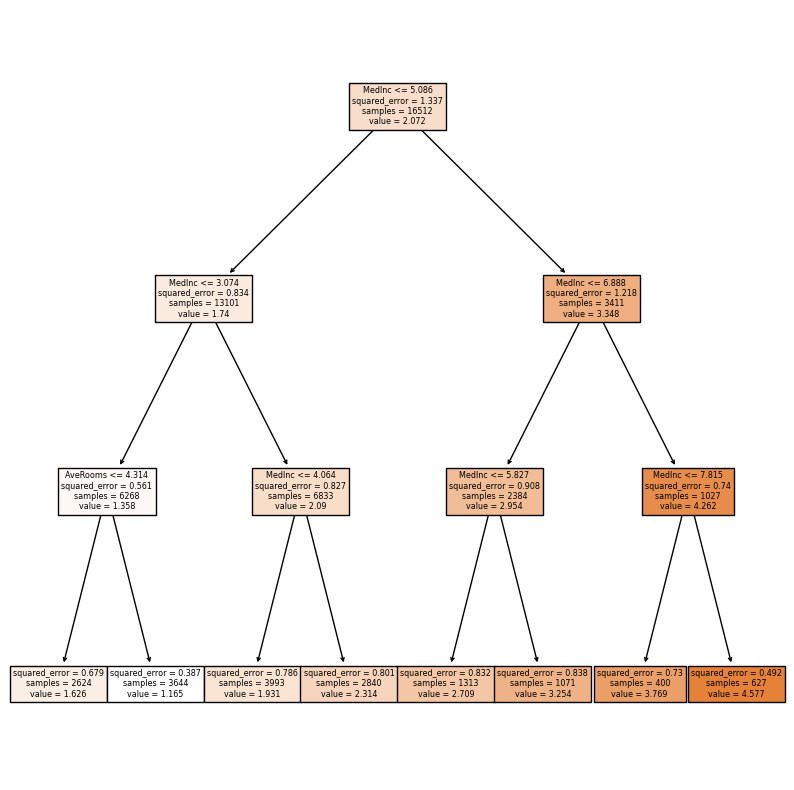

In [103]:
#결정트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(model,
          filled = True,
          feature_names = ['MedInc','AveRooms'],
          class_names = ['MedPrice'])
plt.show()

## **그리드 서치**

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#from tqdm import tqdm
regressor = DecisionTreeRegressor(random_state=42)
hps = {'max_depth' : list(range(1, 11))}

#낮은게 좋음
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_serach = GridSearchCV(regressor,
                        hps,
                        cv=5,
                        scoring=scorer)

grid_serach.fit(X_train, y_train)

print(f'Best Params: {grid_serach.best_params_}')
print(f'Best Score: {grid_serach.best_score_}')

Best Params: {'max_depth': 6}
Best Score: -0.6181574550660847
